In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
import os

# Add the src directory to the Python path
src_path = os.path.join(os.getcwd(), 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

In [12]:
import ast
import csv
import itertools
import random
from itertools import product

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from loss_functions import *
from src.activation_functions import *
from src.batch_normalization import *
from src.data_preprocessing import *
from src.ensemble.cascade_correlation import CascadeCorrelation
from src.k_fold_cross_validation import *
from src.layer import *
from src.model_regularization import *
from src.neural_network import *
from src.optimizers import *
from src.random_search import *
from src.train_and_evaluate import *
from src.utils import *
from src.dropout import *

# from src.random_search import *

np.random.seed(0)

<!-- #### Data pre-processing for MONK Datasets  -->

In [13]:
X_train, y_train = load_data(MONK_NUM=1)
X_test, y_test = load_data(MONK_NUM=1, train=False)

one hot encoded data:  (124, 17)
one hot encoded data:  (432, 17)


In [14]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_val = np.asarray(X_val)
y_val = np.asarray(y_val)

In [15]:
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Training set overlap with validation set:",
      np.intersect1d(X_train, X_val).shape[0])

Training set size: 99
Validation set size: 25
Training set overlap with validation set: 2


In [16]:
# Print the shape of the resulting datasets
for _ in [X_train, X_val, y_train, y_val]:
    print(f"the shape: ", _.shape)

the shape:  (99, 17)
the shape:  (25, 17)
the shape:  (99,)
the shape:  (25,)


In [56]:
param_distributions = {
    'hidden_activation': [Activation_Sigmoid],
    'learning_rate': [2e-3],
    'l1': [2e-4, 1e-4],
    'l2': [5e-7, 1e-7],
    'batch_size': [8],
    'n_epochs': [150, 200],
    'patience': [40, 50],
    'max_depth': [6, 7, 8],
    'weight_decay': [7e-6, 1e-5],
    'output_activation': [Activation_Leaky_ReLU, Activation_Sigmoid, Activation_Linear]   
}

TODO:

Create a seperate best_results csv file for each MONK 

In [57]:
best_hyperparams, best_performance = random_search(X_train=X_train,
                                                   y_train=y_train,
                                                   param_distributions=param_distributions,
                                                   n_iters=50)  # adjust n_iters as needed

print(best_hyperparams)

Data shapes:
X_train: (79, 17), y_train: (79,)
Epoch 0: Train Loss: 0.4079, Acc: 54.11% | Val Loss: 0.4985, Acc: 45.00%
Epoch 10: Train Loss: 0.2381, Acc: 56.96% | Val Loss: 0.3235, Acc: 65.00%
Epoch 20: Train Loss: 0.2215, Acc: 62.14% | Val Loss: 0.2891, Acc: 65.00%
Epoch 30: Train Loss: 0.2183, Acc: 63.21% | Val Loss: 0.2880, Acc: 65.00%
Epoch 40: Train Loss: 0.2156, Acc: 65.54% | Val Loss: 0.2887, Acc: 65.00%
Epoch 50: Train Loss: 0.2095, Acc: 68.21% | Val Loss: 0.2895, Acc: 65.00%
Epoch 60: Train Loss: 0.2045, Acc: 67.14% | Val Loss: 0.2918, Acc: 65.00%
Epoch 70: Train Loss: 0.2006, Acc: 66.96% | Val Loss: 0.2942, Acc: 65.00%
Early stopping at epoch 70
Restoring model weights from epoch 30
Weights cannot be restored, network size changed
✅ Fold 1/5 | Validation Accuracy: 0.6500
Data shapes:
X_train: (79, 17), y_train: (79,)
Epoch 0: Train Loss: 0.2623, Acc: 51.96% | Val Loss: 0.2463, Acc: 55.00%
Epoch 10: Train Loss: 0.2431, Acc: 57.14% | Val Loss: 0.2559, Acc: 65.00%
Epoch 20: Tra

In [58]:
print(best_hyperparams)

{'hidden_activation': <class 'src.activation_functions.Activation_Sigmoid'>, 'learning_rate': 0.002, 'l1': 0.0001, 'l2': 5e-07, 'batch_size': 8, 'n_epochs': 200, 'patience': 40, 'max_depth': 6, 'weight_decay': 7e-06, 'output_activation': <class 'src.activation_functions.Activation_Linear'>, 'val_accuracy': np.float64(0.6973684210526316)}


GRID SEARCH

In [59]:

# model = NN(
#     l1=l1,
#     l2=l2,
#     input_size=17,
#     hidden_sizes=hidden_size,
#     output_size=1,
#     hidden_activations=hidden_activation,
#     dropout_rates=[dropout_rate],
#     use_batch_norm=use_batch_norm
# )
model = CascadeCorrelation(input_size = 17, output_size= 1, activation=best_hyperparams['hidden_activation'], output_activation = best_hyperparams['output_activation'], max_depth=best_hyperparams['max_depth'])

Data shapes:
X_train: (99, 17), y_train: (99,)
Epoch 0: Train Loss: 0.7175, Acc: 43.27% | Val Loss: 0.7073, Acc: 44.00%
Epoch 10: Train Loss: 0.4043, Acc: 56.09% | Val Loss: 0.5009, Acc: 36.00%
Epoch 20: Train Loss: 0.3735, Acc: 58.97% | Val Loss: 0.4458, Acc: 44.00%
Epoch 30: Train Loss: 0.2991, Acc: 60.26% | Val Loss: 0.4168, Acc: 44.00%
Epoch 40: Train Loss: 0.2454, Acc: 68.27% | Val Loss: 0.3991, Acc: 56.00%
Epoch 50: Train Loss: 0.2244, Acc: 69.55% | Val Loss: 0.3863, Acc: 56.00%
Epoch 60: Train Loss: 0.1964, Acc: 73.08% | Val Loss: 0.3765, Acc: 60.00%
Epoch 70: Train Loss: 0.1922, Acc: 76.28% | Val Loss: 0.3674, Acc: 68.00%
Epoch 80: Train Loss: 0.1842, Acc: 78.21% | Val Loss: 0.3529, Acc: 72.00%
Epoch 90: Train Loss: 0.1715, Acc: 83.65% | Val Loss: 0.3491, Acc: 72.00%
Epoch 100: Train Loss: 0.1619, Acc: 84.62% | Val Loss: 0.3481, Acc: 72.00%
Epoch 110: Train Loss: 0.1837, Acc: 81.41% | Val Loss: 0.3481, Acc: 72.00%
Epoch 120: Train Loss: 0.1602, Acc: 83.65% | Val Loss: 0.3473, A

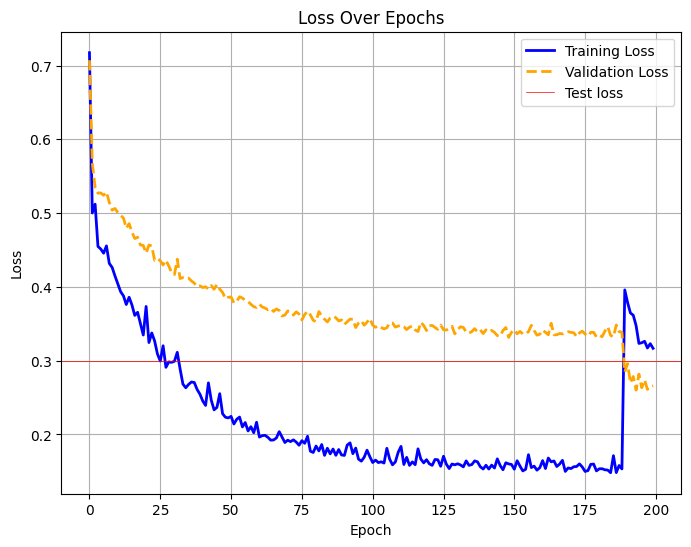

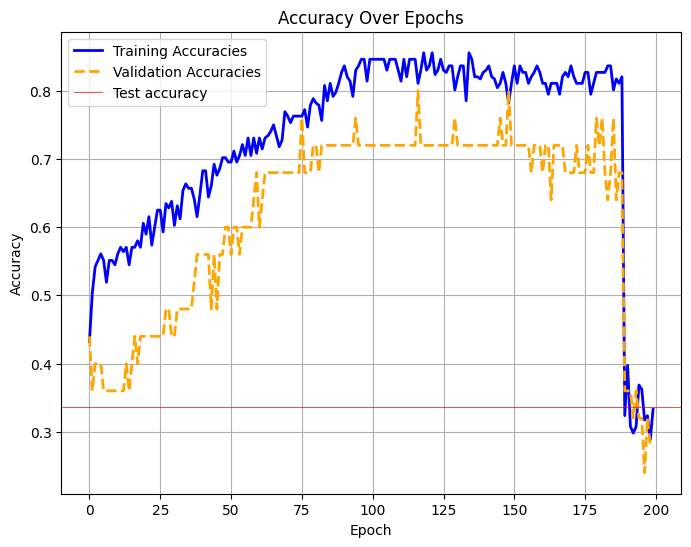

In [60]:
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

loss_function = MSE()
optimizer = Optimizer_Adam(learning_rate=best_hyperparams['learning_rate'], decay=best_hyperparams['weight_decay'])

# Initialize early stopping
early_stopping = EarlyStopping(best_hyperparams['patience'], min_delta_loss=1e-5, min_delta_accuracy=0.001)

# Before training loop:
print("Data shapes:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
# print(f"Sample prediction: {model.forward(X_train[:1])}")
# print(f"Initial loss: {loss_function.forward(model.output, y_train[:1])}")

# Training loop
for epoch in range(best_hyperparams['n_epochs']):
    batch_losses = []
    batch_accuracies = []

    for X_batch, y_batch in create_batches(X_train, y_train, best_hyperparams['batch_size']):
        # Forward pass
        model.forward(X_batch, training=True)

        # Loss and accuracy
        loss = loss_function.forward(model.output, y_batch)
        predictions = np.round(model.output.squeeze())
        accuracy = np.mean(predictions == y_batch.squeeze())

        # Backward pass
        loss_function.backward(model.output, y_batch)
        dvalues = loss_function.dinputs

        assert dvalues.shape == model.output.shape, \
            f"Gradient shape mismatch: {dvalues.shape} vs {model.output.shape}"
        
        i = 0
        for layer in reversed(model.layers):
            i=-1
            layer.backward(dvalues)
            dvalues = np.array(layer.dinputs)

            # Regularization
            if isinstance(layer, Layer_Dense):
                if layer.l1 > 0:
                    layer.dweights += layer.l1 * np.sign(layer.weights)
                if layer.l2 > 0:
                    layer.dweights += 2 * layer.l2 * layer.weights

        # Update weights
        optimizer.pre_update_params()
        for layer in model.layers:
            if isinstance(layer, Layer_Dense):
                optimizer.update_params(layer)
        optimizer.post_update_params()

        batch_losses.append(loss)
        batch_accuracies.append(accuracy)

    # Epoch summary
    epoch_loss = np.mean(batch_losses)
    epoch_acc = np.mean(batch_accuracies)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)

    # Validation
    X_val_input = X_val.values if isinstance(X_val, pd.DataFrame) else X_val
    y_val_input = y_val.values if isinstance(y_val, (pd.Series, pd.DataFrame)) else y_val

    model.forward(X_val_input, training=False)
    val_loss = loss_function.forward(model.output, y_val_input)
    val_predictions = np.round(model.output.squeeze())
    val_accuracy = np.mean(val_predictions == y_val.squeeze())

    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: ", end="")
        print(f"Train Loss: {epoch_loss:.4f}, Acc: {epoch_acc*100:.2f}% | ", end="")
        print(f"Val Loss: {val_loss:.4f}, Acc: {val_accuracy*100:.2f}%")

    # Early stopping check
    early_stopping.on_epoch_end(
        current_loss=val_loss,
        current_accuracy=val_accuracy,
        model=model,
        epoch=epoch
    )

    if early_stopping.stop_training:
        print(f"Early stopping at epoch {epoch}")
        # Restore best weights
        print(f"Restoring model weights from epoch {early_stopping.best_epoch}")
        early_stopping.restore_weights(model)
        # Cascade correlation
        if isinstance(model, CascadeCorrelation):
            if model.is_limit_reached():
                break
            
            model.add_neuron()
            early_stopping.wait = 0
            early_stopping.patience -= int(early_stopping.patience / 10)
            early_stopping.stop_training = False
            print(f"Added new neuron at epoch {epoch} wiht val_loss {val_losses[-1]:.4f}")
            continue
        break
# Final evaluation
model.forward(X_val, training=False)
final_val_loss = loss_function.forward(model.output, y_val)
final_val_accuracy = np.mean(np.round(model.output.squeeze()) == y_val.squeeze())
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


# Test set evaluation
model.forward(X_test, training=False)
test_loss = loss_function.forward(model.output.squeeze(), y_test)

predictions = np.round(model.output.squeeze())
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")


# Plot training progress
plot_losses(train_losses, val_losses, test_loss,
            label1="Training Loss", label2="Validation Loss",
            title="Loss Over Epochs")

plot_accuracies(train_accuracies, val_accuracies, test_accuracy,
                label1="Training Accuracies", label2="Validation Accuracies",
                title="Accuracy Over Epochs")

In [61]:
print(test_loss, test_accuracy)

0.29923438464907987 0.33564814814814814


In [62]:
model.forward(X_test, training=False)
# Compute softmax probabilities for the test output
# print(X_test.shape, y_test.shape)
# print(model.output, y_test)
loss_function.forward(model.output.squeeze(), y_test)
# Calculate accuracy for the test set
predictions = np.round(model.output.squeeze())
if len(y_test.shape) == 2:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

# Compute test accuracy
test_accuracy = np.mean(predictions == y_true)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.3356


In [63]:
# class EnsembleNN:
#     def __init__(self, n_models=5):
#         self.models = []
#         self.n_models = n_models
#         self.loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
        
            

#     def create_and_train_models(self, hyperparams):
#         # Create and train multiple models with the same hyperparameters
#         for i in range(self.n_models):
#             model = NN(
#                 l1=l1,
#                 l2=l2,
#                 input_size=17,
#                 hidden_sizes=hidden_size,
#                 output_size=1,
#                 hidden_activations=hidden_activation,
#                 dropout_rates=[dropout_rate],
#                 use_batch_norm=use_batch_norm
#             )
#             print(f"Training model {i+1}/{self.n_models}")
#             # Train model using existing train_and_evaluate function
#             model, val_accuracy = train_and_evaluate(
#                 learning_rate=hyperparams['learning_rate'],
#                 # l1=hyperparams['l1'],
#                 # l2=hyperparams['l2'],
#                 # dropout_rate=hyperparams['dropout_rate'],
#                 batch_size=hyperparams['batch_size'],
#                 n_epochs=hyperparams['n_epochs'],
#                 weight_decay=hyperparams['weight_decay'],
#                 # model=hyperparams['model']
#                 # activation=hyperparams['activation']
#                 X_train=X_train,
#                 y_train=y_train,
#                 X_val=X_val,
#                 y_val=y_val,
#                 model=model,
#             )
#             self.models.append(model)
#             print(f"Model {i+1} validation accuracy: {val_accuracy:.4f}")

#     def predict(self, X):
#         """Make predictions using majority voting"""
#         predictions = []
#         for model in self.models:
#             model.forward(X, training=False)
#             self.loss_activation.forward(
#                 model.output, np.zeros((X.shape[0], 2)))  # Dummy y values
#             pred = np.argmax(self.loss_activation.output, axis=1)
#             predictions.append(pred)

#         # Majority voting
#         predictions = np.array(predictions)
#         final_predictions = np.apply_along_axis(
#             lambda x: np.bincount(x).argmax(),
#             axis=0,
#             arr=predictions
#         )
#         return final_predictions

In [64]:
# ensemble = EnsembleNN(n_models=5)

# ensemble.create_and_train_models(best_hyperparams)

# test_predictions = ensemble.predict(X_test)
# test_accuracy = np.mean(test_predictions == y_test)

# print(f"Ensemble Test Accuracy: {test_accuracy:.4f}")